# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
target = data['Class']

In [5]:
features = data.drop(columns=['Class'])

In [6]:
features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,0.137028,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,0.643614,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,0.104002,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.057182,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999


In [7]:
target

0        0
1        0
2        0
3        0
4        0
        ..
28673    0
28674    0
28675    0
28676    0
28677    0
Name: Class, Length: 28678, dtype: int64

In [8]:
target.value_counts()

0    28432
1      246
Name: Class, dtype: int64

10:1의 비율로 데이터가 불균형함을 볼 수 있다.
 - 분류 평가지표는 정확도, 정밀도, 재현률, F1점수, AUC 가 있다.
 - 불균형 데이터의 경우 정확도는 정확한 평가지표가 될 수 없다 (해당 예제의 경우에서 모두 0으로 분류해도 정확도가 90%이상이 나오기 때문)


## 로지스틱 회귀분석

In [9]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state = 10)

In [10]:
from sklearn.linear_model import LogisticRegression
log_re = LogisticRegression()
log_re.fit(train_x, train_y)

pred = log_re.predict(test_x)

In [11]:
from sklearn.metrics import confusion_matrix

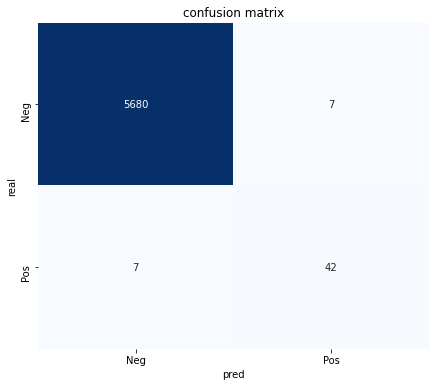

정확도 :  0.9975592747559274   정밀도 :  0.8571428571428571   재현율 :  0.8571428571428571   f1-score :  0.8571428571428571


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
cm = confusion_matrix(test_y,pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('confusion matrix')
plt.ylabel('real')
plt.xlabel('pred')
plt.xticks([0.5,1.5],['Neg','Pos'])
plt.yticks([0.5,1.5],['Neg','Pos'])
plt.show()

tn, fp, fn, tp = confusion_matrix(test_y,pred).ravel()
acc = (tp+tn)/(tp+tn+fp+fn) #정확도
pre = tp / (tp+fp) #정밀도
recall = tp/(tp+fn) #재현율
f1_score = 2*(pre*recall)/(pre+recall) #f1-score
print("정확도 : ",acc, "  정밀도 : ", pre,"  재현율 : ",recall, "  f1-score : ",f1_score)

In [13]:
#ROC 커브를 그리는 함수
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [14]:
#클래스 1의 확률
prob = log_re.predict_proba(test_x)[:,1]

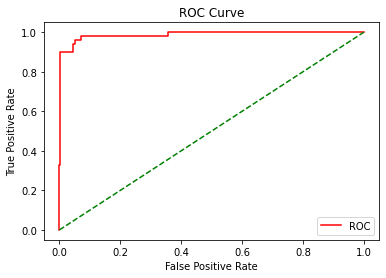

In [15]:
from sklearn.metrics import roc_curve
fper, tper, thresholds = roc_curve(test_y, prob)
plot_roc_curve(fper, tper)

In [16]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_y, prob)
print(f'AUC Score : {auc:.5f}')

AUC Score : 0.98801


##### 성능지표로는 재현율과 정밀도를 모두 고려한 f1-score가 적합하다고 생각된다

- 자료의 불균형을 해소하여 성능을 개선할 수 있다.

In [17]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

# train데이터를 넣어 복제
X_resampled, y_resampled = smote.fit_resample(train_x,list(train_y))

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))



After OverSampling, the shape of train_X: (45490, 28)


In [18]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 10)

In [19]:
log_re_sm = LogisticRegression()
log_re_sm.fit(train_x, train_y)

pred = log_re_sm.predict(test_x)

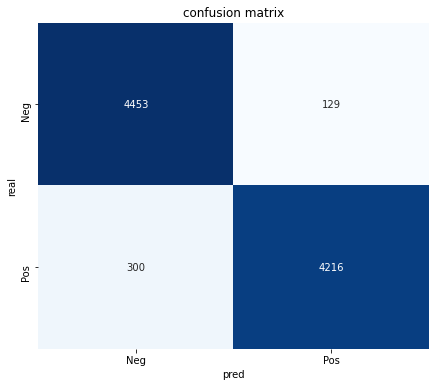

정확도 :  0.9528467795119806   정밀도 :  0.9703107019562716   재현율 :  0.933569530558016   f1-score :  0.9515855998194335


In [20]:
cm = confusion_matrix(test_y,pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('confusion matrix')
plt.ylabel('real')
plt.xlabel('pred')
plt.xticks([0.5,1.5],['Neg','Pos'])
plt.yticks([0.5,1.5],['Neg','Pos'])
plt.show()

tn, fp, fn, tp = confusion_matrix(test_y,pred).ravel()
acc = (tp+tn)/(tp+tn+fp+fn) #정확도
pre = tp / (tp+fp) #정밀도
recall = tp/(tp+fn) #재현율
f1_score = 2*(pre*recall)/(pre+recall) #f1-score
print("정확도 : ",acc, "  정밀도 : ", pre,"  재현율 : ",recall, "  f1-score : ",f1_score)

#### SMOTE의 결과 f1-score가 0.86에서 0.95까지 높아진 것을 볼 수 있다. 또한 정밀도와 재현율도 각각 0.86과 0.86에서 0.97과 0.93으로 오른 것을 볼 수 있다. 때문에 데이터의 불균형 해소 작업이 분류 성능을 높일 수 있다는 것을 알 수 있다.